In [2]:
# !pip install pandas numpy statistics matplotlib seaborn

- Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

- Importing Data

In [2]:
df= pd.read_csv("data.csv")
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [3]:
df.shape

(25000, 19)

In [4]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [5]:
df['Drug'].value_counts()

Drug
Placebo            15827
D-penicillamine     9173
Name: count, dtype: int64

In [6]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [7]:
st.median(df['Copper']),st.median(df['Platelets'])

(97.6483871, 251.0)

In [8]:
def median(var):
    z = df[df[var].notnull()]
    z = z[[var,'Stage']].groupby(['Stage'])[[var]].median().reset_index()
    return z

In [9]:
df.nunique()

N_Days           549
Status             3
Drug               2
Age              510
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        113
Cholesterol      220
Albumin          179
Copper           197
Alk_Phos         336
SGOT             240
Tryglicerides    157
Platelets        295
Prothrombin       51
Stage              3
dtype: int64

In [10]:
cholestrol = median('Cholesterol')
tryglicerides = median('Tryglicerides')
cholestrol, tryglicerides

(   Stage  Cholesterol
 0      1   369.510563
 1      2   369.510563
 2      3   369.510563,
    Stage  Tryglicerides
 0      1     124.702128
 1      2     124.702128
 2      3     124.702128)

In [17]:
cholestrol['Cholesterol'][0]

np.float64(369.5105634)

In [18]:
df.loc[(df['Stage']==1)&(df['Cholesterol'].isnull()),'Cholesterol']=cholestrol['Cholesterol'][0]
df.loc[(df['Stage']==2)&(df['Cholesterol'].isnull()),'Cholesterol']=cholestrol['Cholesterol'][1]
df.loc[(df['Stage']==3)&(df['Cholesterol'].isnull()),'Cholesterol']=cholestrol['Cholesterol'][2]

In [20]:
df.loc[(df['Stage']==1)&(df['Tryglicerides'].isnull()),'Tryglicerides']=tryglicerides['Tryglicerides'][0]
df.loc[(df['Stage']==2)&(df['Tryglicerides'].isnull()),'Tryglicerides']=tryglicerides['Tryglicerides'][1]
df.loc[(df['Stage']==3)&(df['Tryglicerides'].isnull()),'Tryglicerides']=tryglicerides['Tryglicerides'][2]

In [21]:
df.loc[(df['Copper'].isnull()),'Copper']=75
df.loc[(df['Platelets'].isnull()),'Platelets']=91.5
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

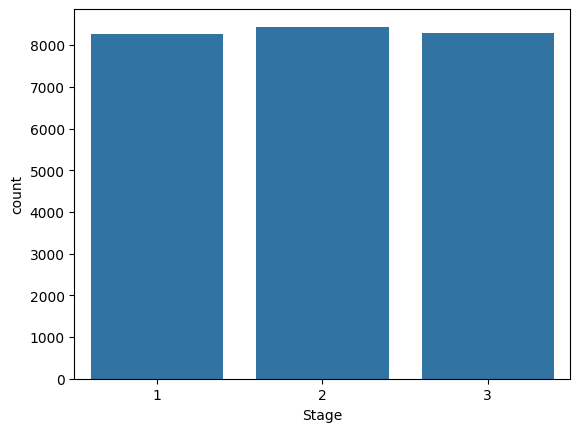

In [11]:
# data is balanced
sns.countplot(x=df['Stage'])
plt.show()

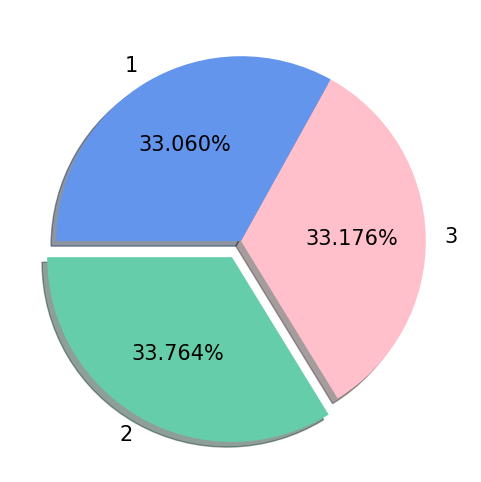

In [12]:
# Pie plot for percentage of each stage level
plt.figure(figsize=(6,6))
data = df['Stage'].value_counts().values.tolist()
label = df['Stage'].value_counts().index.tolist()
plt.pie(data, labels = label, autopct = '%.3f%%', colors=['mediumaquamarine','pink','cornflowerblue'], startangle =180, explode=[0.1,0,0], shadow = True)

for text in plt.gca().texts:
     text.set_fontsize(15)
plt.show()

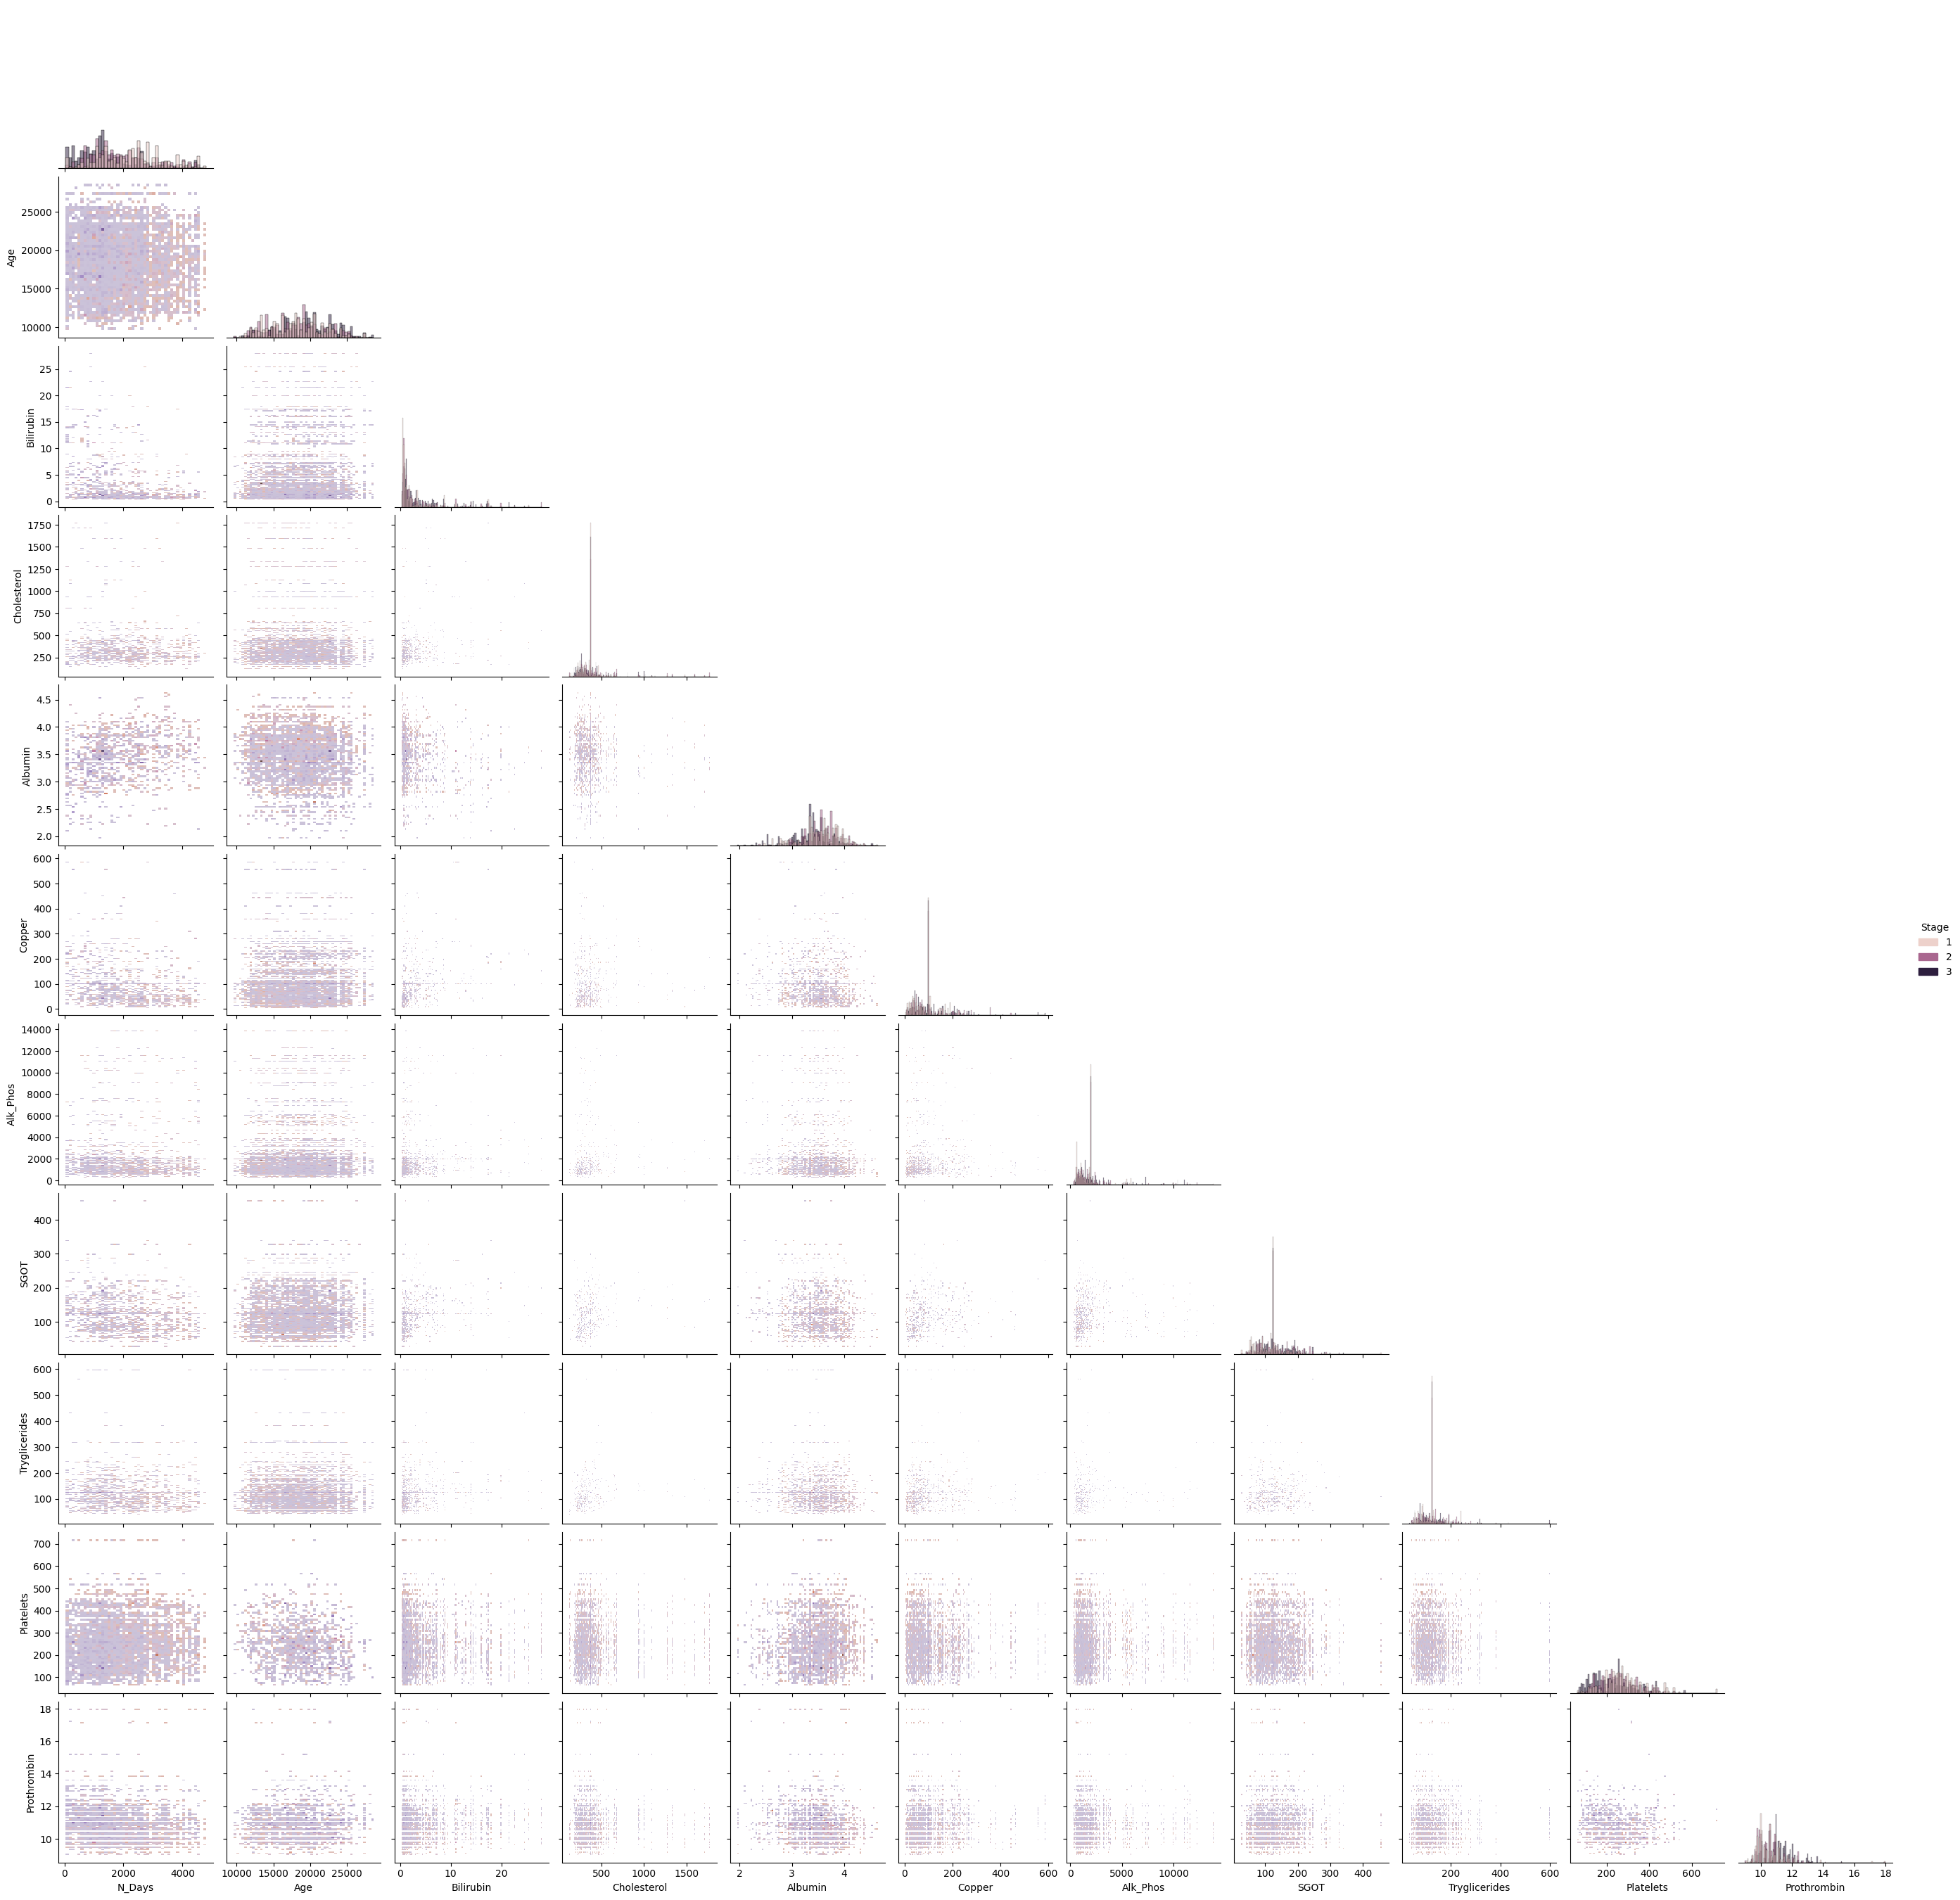

In [13]:
from pandas.plotting import scatter_matrix
sns.pairplot(df,hue="Stage",kind="hist",corner=True)
plt.show()

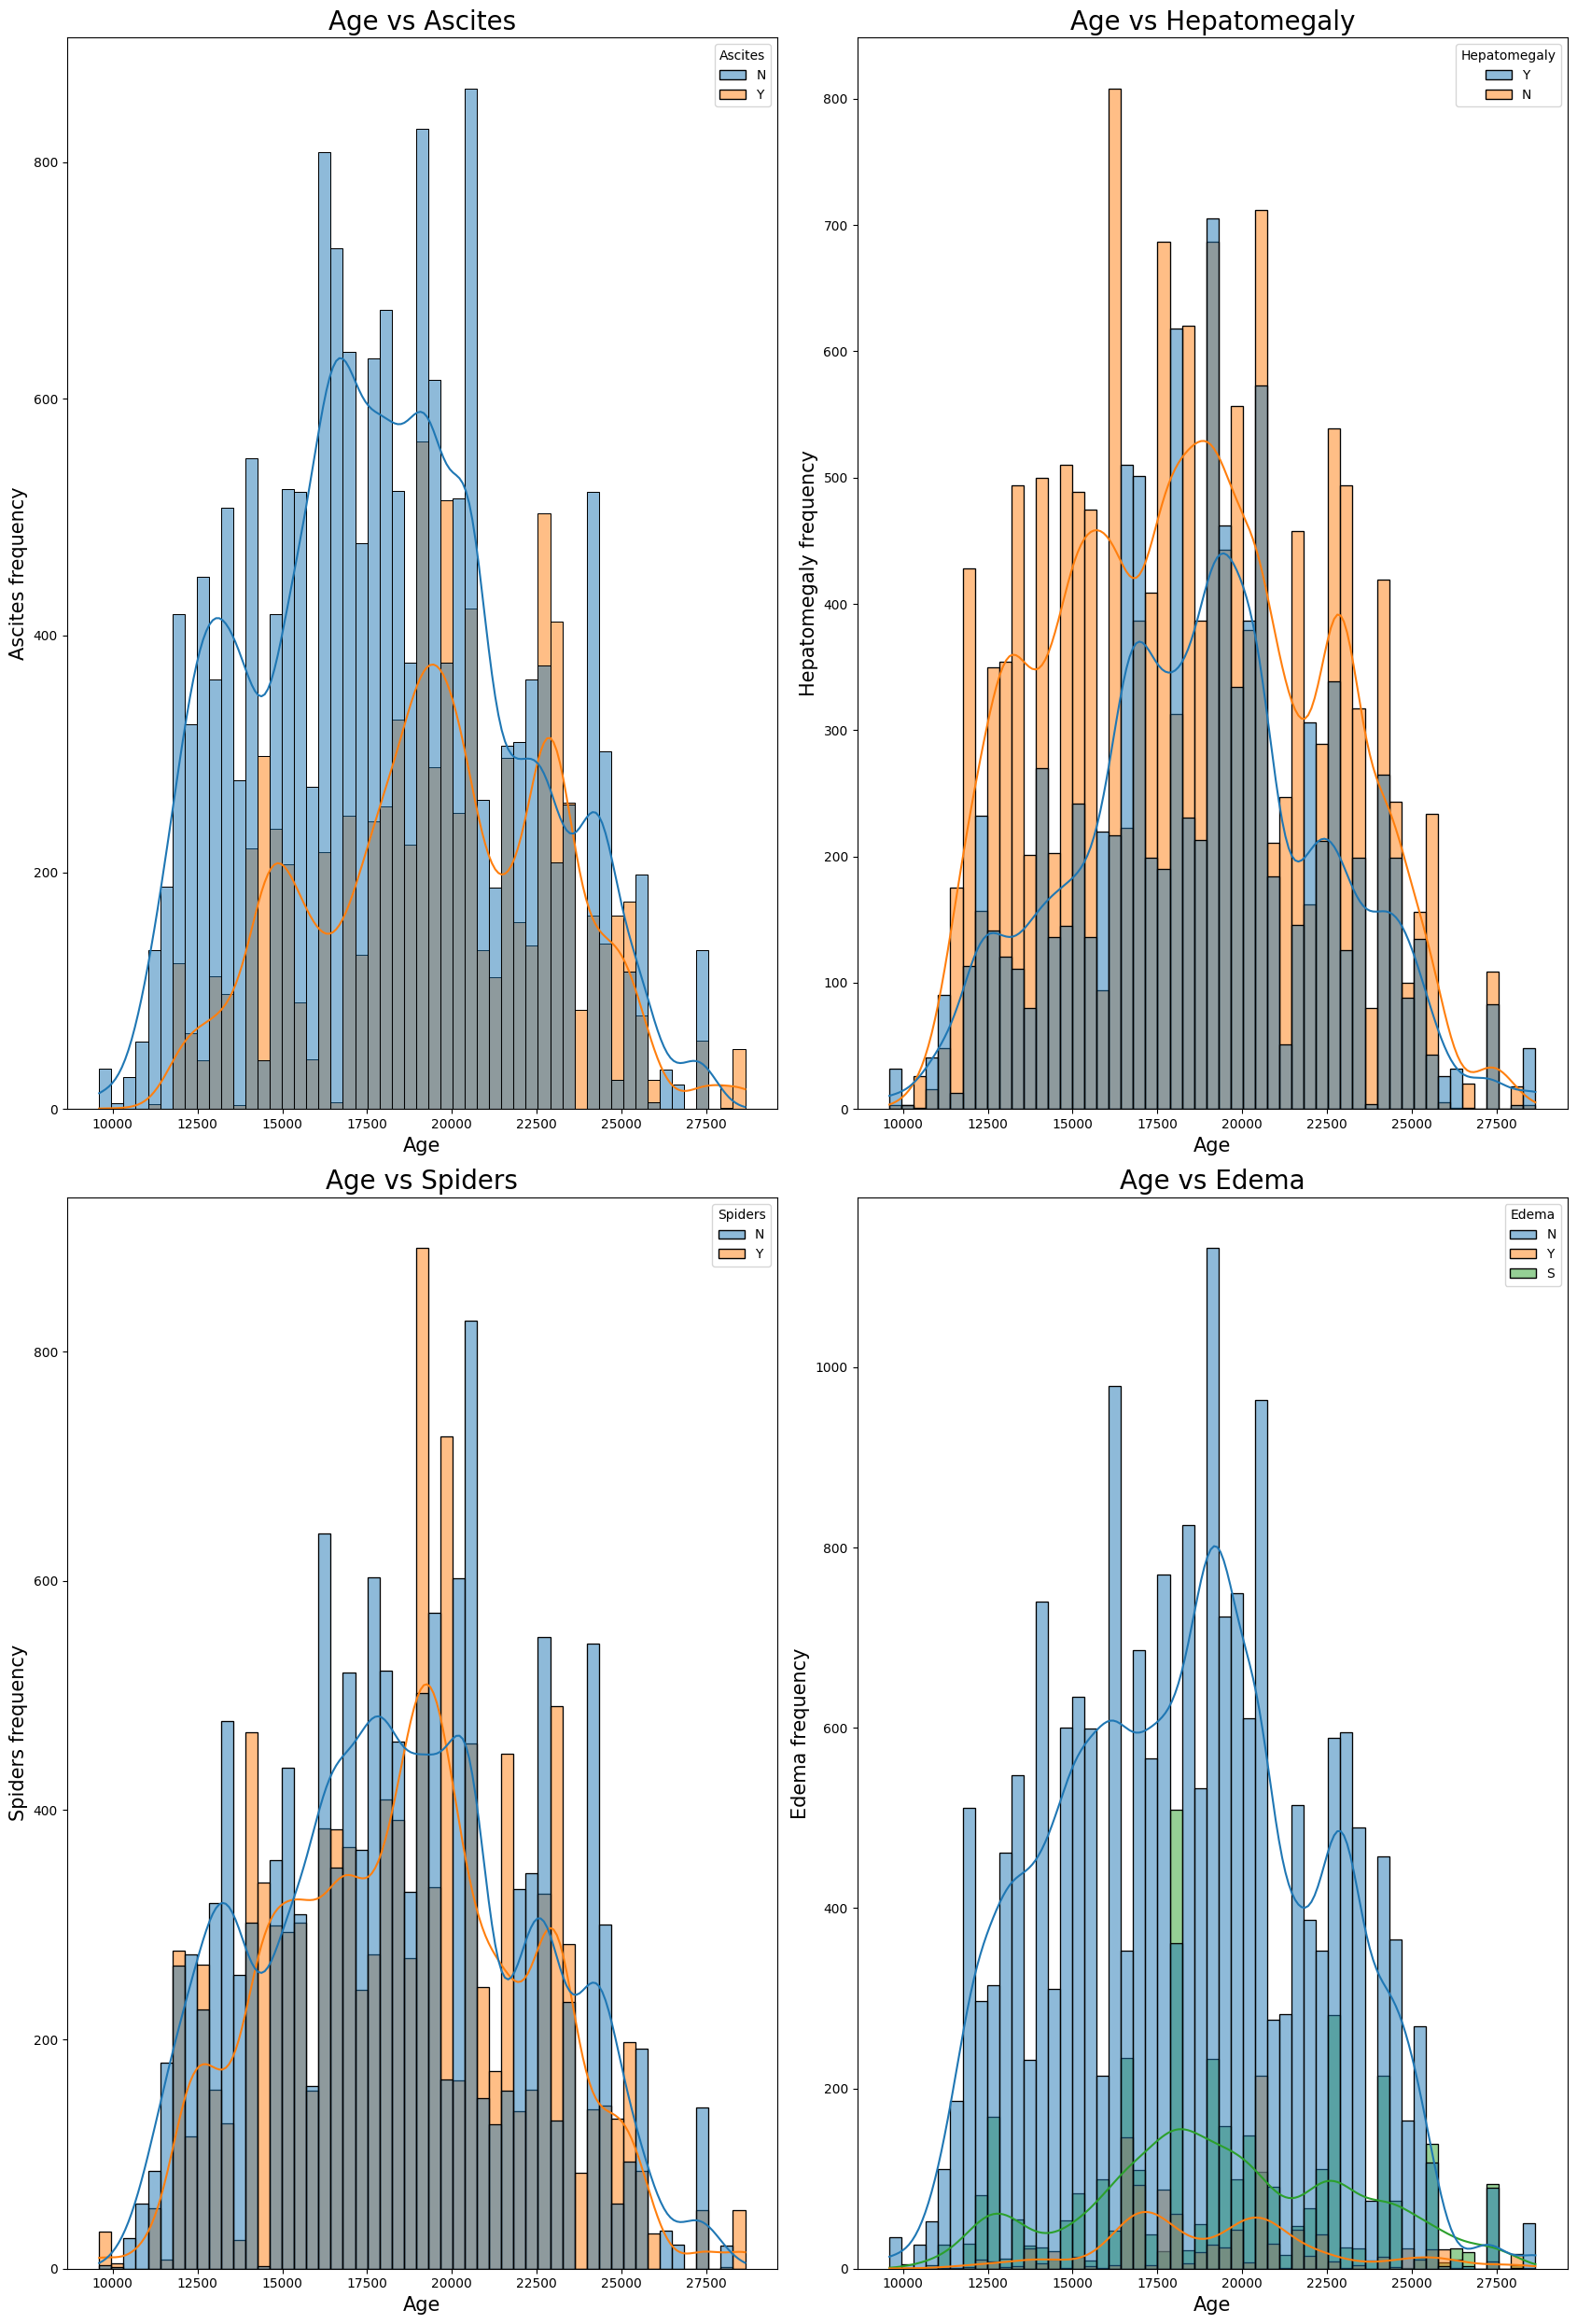

In [34]:
cols = ['Ascites','Hepatomegaly','Spiders','Edema']
df.Age = df.Age.astype(int)
fig, axes = plt.subplots(figsize=(17, 25), nrows=2, ncols=2)
axes = axes.flatten()

for i in range(len(cols)):
    sns.histplot(data=df, hue=df[cols[i]], x='Age', ax=axes[i], kde=True)
    axes[i].set_ylabel(f'{cols[i]} frequency', fontsize=15)
    axes[i].set_xlabel("Age", fontsize=15)
    axes[i].set_title(f'Age vs {cols[i]}', fontsize=20)
    plt.tight_layout()
for j in range(len(cols), len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

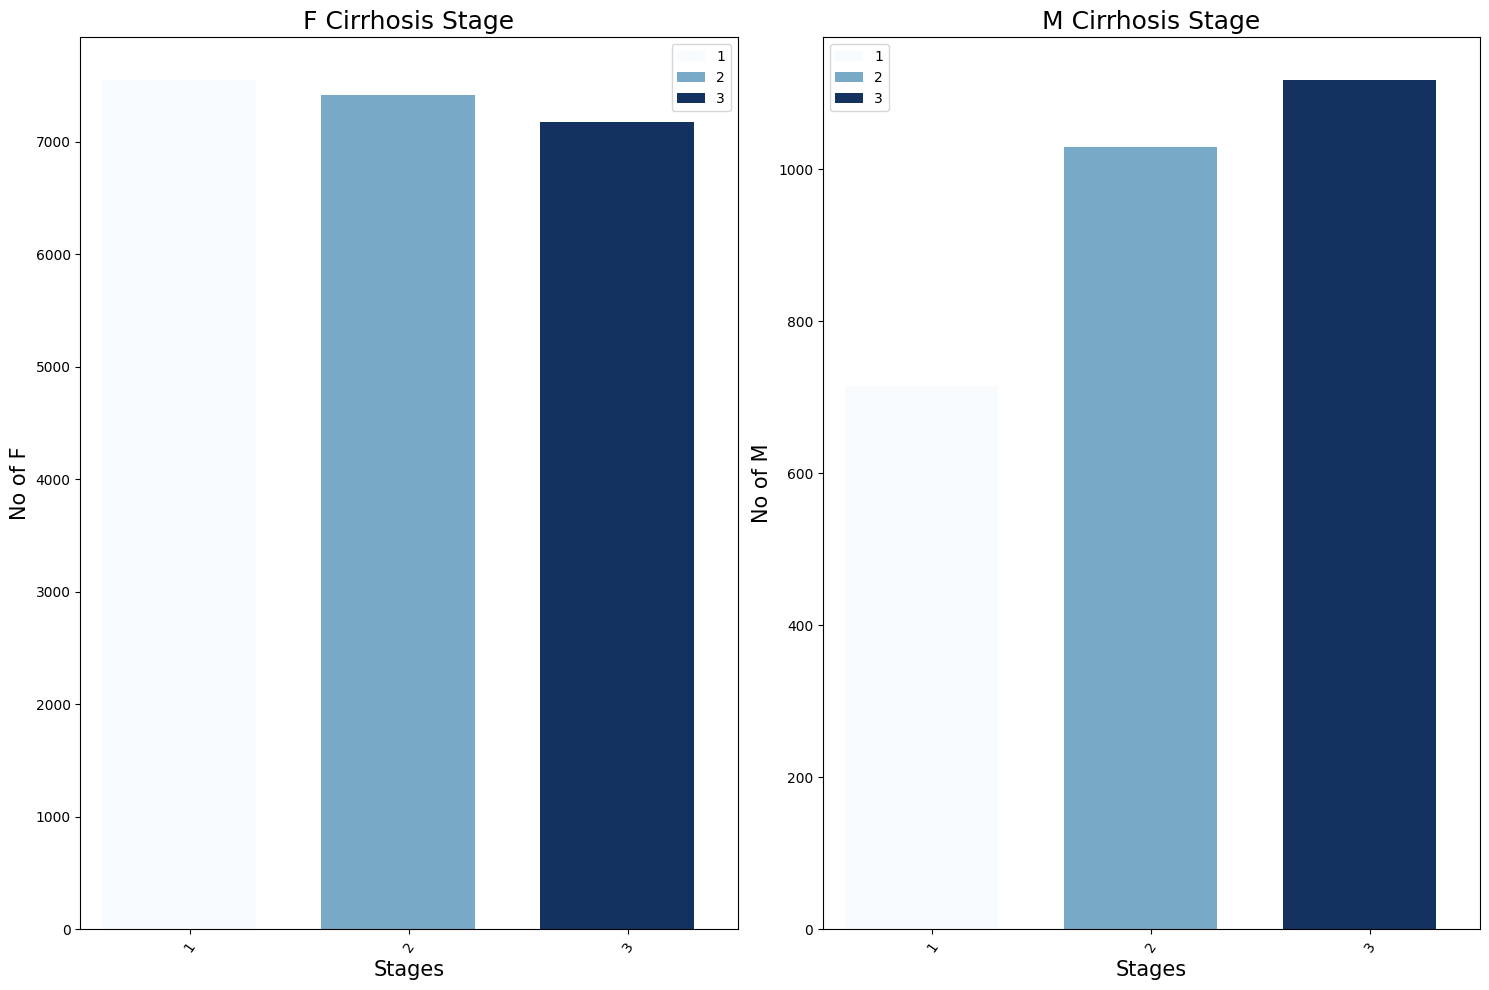

In [14]:
df_gender_OL = df.groupby(['Stage', 'Sex']).size().unstack()
plt.figure(figsize=(15, 10))  
fig, axis = plt.subplots(figsize=(15, 10), nrows=1, ncols=2)

Gender = ["F", "M"]
for i in range(2):
    X = df_gender_OL.index.tolist()
    Y = df_gender_OL[Gender[i]].value_counts().index.tolist()
    ax = sns.barplot(data=df_gender_OL, x=X, y=Y, ax=axis[i], hue=X, palette='Blues') 
    for bar in ax.patches: 
        bar.set_width(0.7)
    axis[i].set_title(f'{Gender[i]} Cirrhosis Stage', fontsize=18)
    axis[i].set_xlabel("Stages", fontsize=15)
    axis[i].set_ylabel(f'No of {Gender[i]}', fontsize=15)
    axis[i].tick_params(axis='x', rotation=55)

plt.tight_layout() 
plt.show()

In [36]:
df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

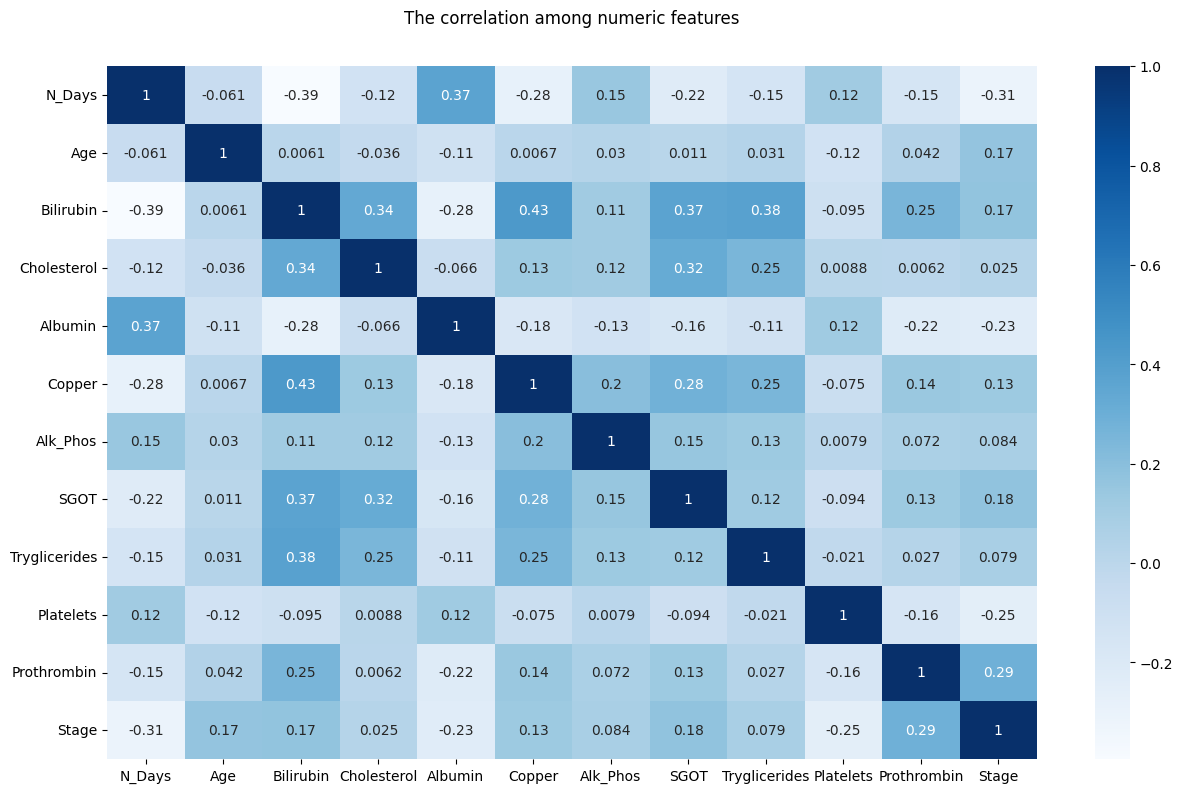

In [20]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap for correlation among numeric features
plt.figure(figsize=(15,9))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="Blues")
plt.title('The correlation among numeric features', y=1.05)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split as tts

In [16]:
#Encoding the Categorical vraiables
pd.set_option('future.no_silent_downcasting', True) 

newdata=pd.get_dummies(df,columns=['Sex','Ascites','Hepatomegaly','Spiders','Edema'],dtype=float)
newdata['Status'] = newdata['Status'].replace({'D': 1, 'C': 0, 'CL': 0})
newdata['Drug'] = newdata['Drug'].replace({'D-penicillamine': 1, 'Placebo': 0})

X = newdata.drop(columns=['Status','Stage'], axis=1)
Y = newdata['Stage']

In [21]:
numeric_cols

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,18499,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,19724,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,11839,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,16467,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,21699,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,23612,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,23612,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,16736,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,16990,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [17]:
X.head()

,N_Days,Drug,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2221,0,18499,0.5,149.0,4.04,227.0,598.0,52.70,57.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1230,0,19724,0.5,219.0,3.93,22.0,663.0,45.00,75.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4184,0,11839,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2090,0,16467,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2105,0,21699,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# def vif(ytest, ypred) -> float:
#     return (1.0 / (1 - r2_score(ytest, ypred)))

def vif(ytest, ypred):
    r2 = r2_score(ytest, ypred)
    if r2 == 1:
        return float('inf')
    else:
        return (1.0 / (1 - r2))

VIF_THRESHOLD = 2.5
print(f"{'Highest VIF Column':25}  Highest VIF Value")

for _ in range(len(numeric_cols.columns)):
    vif_vals = pd.Series()
    for col in X.columns:
        y_new = X[col]
        x_new = X.drop(col, axis=1)
        lr = LinearRegression()
        lr.fit(x_new, y_new)
        ypred = lr.predict(x_new)
        vif_vals[col] = vif(y_new, ypred)
    highest_vif_col = vif_vals.idxmax()
    highest_vif = vif_vals.max()
    if highest_vif <= VIF_THRESHOLD:
        print('VIF Threshold Reached. All columns have VIF <= 2.5')
        break
    print(f"{highest_vif_col:25}  {highest_vif:4.3f}")
    X.drop(highest_vif_col, axis=1, inplace=True)

Highest VIF Column         Highest VIF Value
Sex_F                       inf
Ascites_N                   inf
Hepatomegaly_N              inf
Spiders_N                   inf
Edema_N                     inf
VIF Threshold Reached. All columns have VIF <= 2.5


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'N_Days'),
  Text(1, 0, 'Drug'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Bilirubin'),
  Text(4, 0, 'Cholesterol'),
  Text(5, 0, 'Albumin'),
  Text(6, 0, 'Copper'),
  Text(7, 0, 'Alk_Phos'),
  Text(8, 0, 'SGOT'),
  Text(9, 0, 'Tryglicerides'),
  Text(10, 0, 'Platelets')])

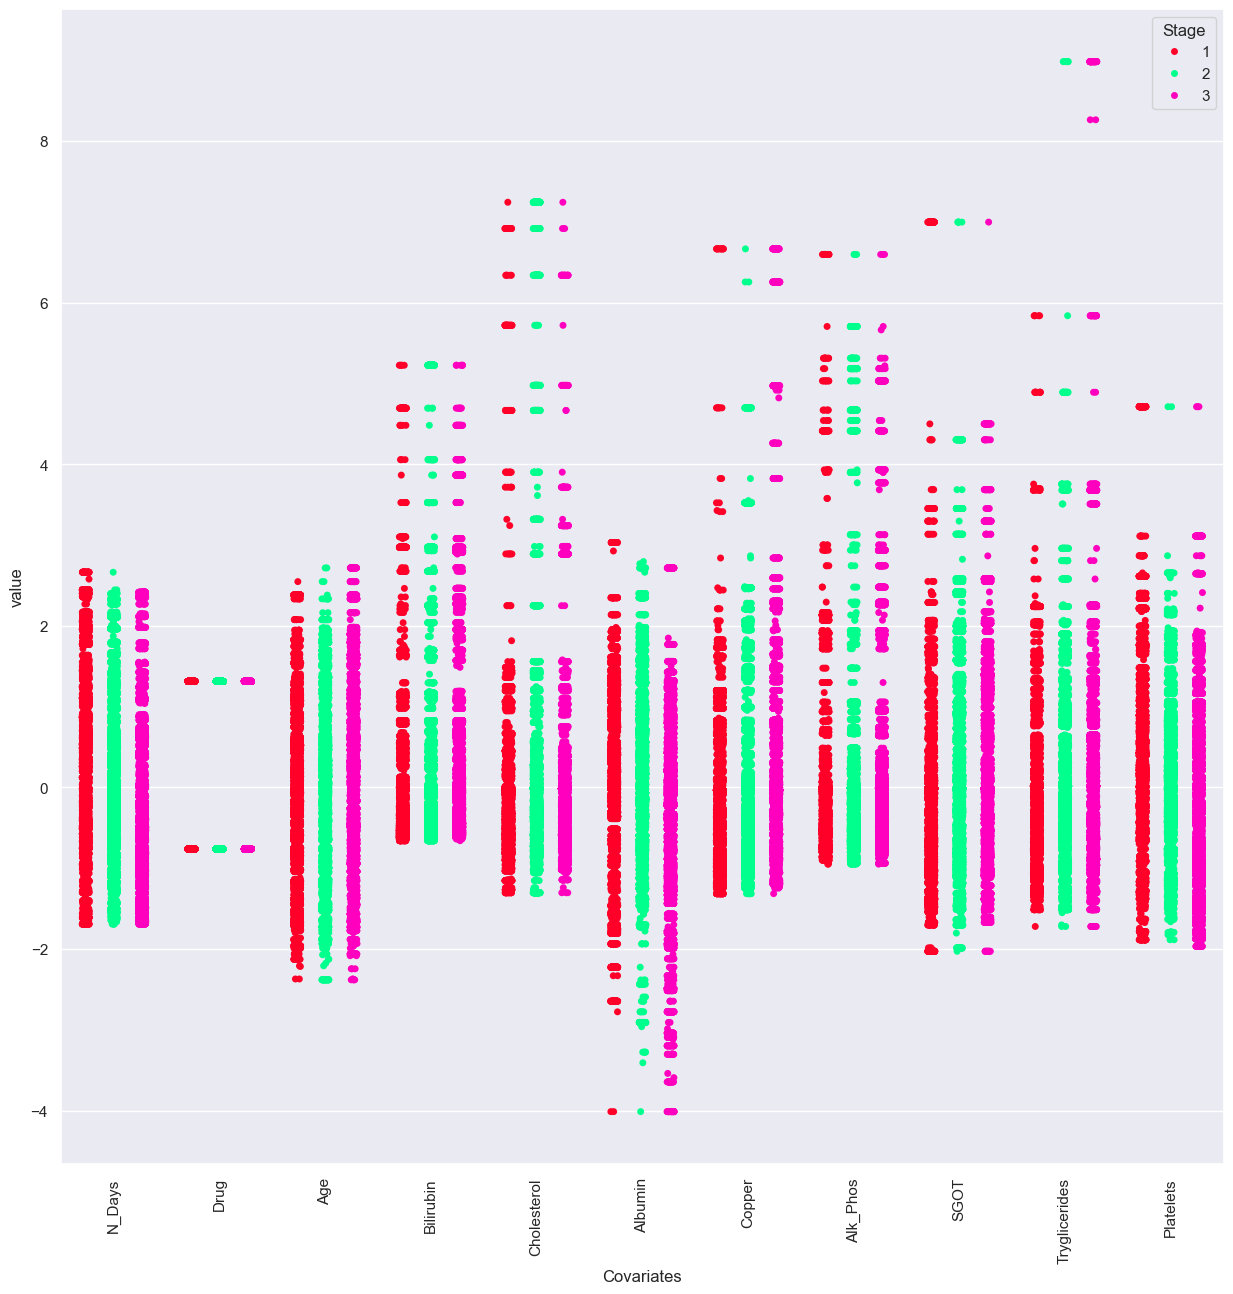

In [50]:
sns.set(style="darkgrid")
data_stage = Y
data = X
data_n_2 = (data - data.mean()) / (data.std())             
data = pd.concat([Y,data_n_2.iloc[:,0:11]],axis=1)
data = pd.melt(data,id_vars="Stage",
                    var_name="Covariates",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.stripplot(x="Covariates", y="value", hue="Stage", data=data, palette='gist_rainbow', dodge=True, edgecolor="green")
plt.xticks(rotation=90)

In [51]:
from sklearn.model_selection import train_test_split as tts

In [52]:
X = df.drop(columns=['Age','Bilirubin', 'Cholesterol', 'Tryglicerides','SGOT','N_Days','Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Stage'], axis=1)
Y = df['Stage']

In [53]:
Xt,X_t,Yt,Y_t = tts(X,Y,test_size=0.25,random_state=23)

In [54]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
mod = OrderedModel(df['Stage'], df[['Age','Bilirubin','Cholesterol','Albumin','Copper','SGOT','Tryglicerides','Platelets','Prothrombin']],distr='logit')

In [55]:
res = mod.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.996540
         Iterations: 37
         Function evaluations: 46
         Gradient evaluations: 46


In [56]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  Stage   Log-Likelihood:                -24913.
Model:                   OrderedModel   AIC:                         4.985e+04
Method:            Maximum Likelihood   BIC:                         4.994e+04
Date:                Fri, 11 Oct 2024                                         
Time:                        23:02:22                                         
No. Observations:               25000                                         
Df Residuals:                   24989                                         
Df Model:                           9                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age             6.14e-05   3.35e-06     18.351      0.000    5.48e-05     6.8e-05
Bilirubin         0.0060      0.003      1.755      0.079      -0.001       0.013
Cholesterol      -0.0004   6.55e-05     -5.834      0.000      -0.001      -0.000
Albumin          -0.7296      0.035    -20.710      0.000      -0.799      -0.661
Copper            0.0006      0.000      3.118      0.002       0.000       0.001
SGOT              0.0046      0.000     15.905      0.000       0.004       0.005
Tryglicerides     0.0017      0.000      6.547      0.000       0.001       0.002
Platelets        -0.0038      0.000    -28.818      0.000      -0.004      -0.004
Prothrombin       0.5644      0.017     33.750      0.000       0.532       0.597
1/2               3.5079      0.249     14.077      0.000       3.019       3.996
2/3               0.5023      0.010     51.373      0.000       0.483       0.521
=================================================================================
"""

In [57]:
from scipy import stats as st
'Drug','Ascites','Hepatomegaly','Spiders','Edema','Stage'
result = st.kruskal(df['Drug'],df['Ascites'],df['Hepatomegaly'],df['Spiders'],df['Edema'])
print(result)

KruskalResult(statistic=np.float64(7266.984450369505), pvalue=np.float64(0.0))


In [58]:
#performing stepwise regression for feature selection
import statsmodels.api as sm
result = sm.OLS(Yt,Xt).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Stage   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                          2.730e+04
Date:                Fri, 11 Oct 2024   Prob (F-statistic):                        0.00
Time:                        23:03:08   Log-Likelihood:                         -21220.
No. Observations:               18750   AIC:                                  4.245e+04
Df Residuals:                   18745   BIC:                                  4.249e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Albumin        -0.1832      0.011    -16.626      0.000      -0.205      -0.162
Copper          0.0006   7.78e-05      8.230      0.000       0.000       0.001
Alk_Phos     2.047e-05   3.07e-06      6.674      0.000    1.45e-05    2.65e-05
Platelets      -0.0015    5.5e-05    -26.719      0.000      -0.002      -0.001
Prothrombin     0.2706      0.004     74.672      0.000       0.264       0.278
==============================================================================
Omnibus:                     1208.765   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              512.835
Skew:                          -0.182   Prob(JB):                    4.36e-112
Kurtosis:                       2.277   Cond. No.                     5.71e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
from sklearn.metrics import cohen_kappa_score as kp
k1 = kp(df['Drug'],df['Ascites'])
k2 = kp(df['Drug'],df['Hepatomegaly'])
k3 = kp(df['Drug'],df['Spiders'])
k4 = kp(df['Ascites'],df['Hepatomegaly'])
k5 = kp(df['Ascites'],df['Spiders'])
k6 = kp(df['Hepatomegaly'],df['Spiders'])
k7 = kp(df['Drug'],df['Edema'])
k8 = kp(df['Ascites'],df['Edema'])
k9 = kp(df['Hepatomegaly'],df['Edema'])
k10 = kp(df['Spiders'],df['Edema'])

k1,k2,k3,k4,k5,k6,k7,k8,k9,k10

(np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-0.2974992362276587),
 np.float64(0.6145898693499601),
 np.float64(-0.12969282969004503),
 np.float64(1.1102230246251565e-16),
 np.float64(0.058306084674483616),
 np.float64(0.11757348654358424),
 np.float64(0.0555126720783744))

In [60]:
#measuring correlation using chi-square test of association
from scipy.stats import chi2_contingency as cont
def is_corr(x,y):
    ct = pd.crosstab(index=df[x],columns=df[y])
    chi_sq_result = cont(ct,)
    p,x = chi_sq_result[1],'correlated'if chi_sq_result[1] < 0.05 else 'not correlated'
    return p,x

In [61]:
print(is_corr('Spiders','Edema'),is_corr('Hepatomegaly','Edema'),is_corr('Ascites','Edema'),is_corr('Drug','Edema'))

(np.float64(6.4329725146812645e-108), 'correlated') (np.float64(6.234366141990792e-291), 'correlated') (np.float64(1.1217500485513027e-81), 'correlated') (np.float64(0.8328647320237598), 'not correlated')


In [62]:
k1 = is_corr('Drug','Ascites')
k2 = is_corr('Drug','Hepatomegaly')
k3 = is_corr('Drug','Spiders')
k4 = is_corr('Ascites','Hepatomegaly')
k5 = is_corr('Ascites','Spiders')
k6 = is_corr('Hepatomegaly','Spiders')
print(k1,k2,k3,k4,k5,k6)

(np.float64(0.0), 'correlated') (np.float64(7.575525910377639e-75), 'correlated') (np.float64(0.0), 'correlated') (np.float64(0.0), 'correlated') (np.float64(0.0), 'correlated') (np.float64(5.603230541711808e-95), 'correlated')


In [63]:
model = OrderedModel(df['Stage'], df[['Albumin','Copper','Platelets','Prothrombin']],distr='logit')

In [64]:
res = model.fit(method='bfgs')
res.summary()

Optimization terminated successfully.
         Current function value: 1.010194
         Iterations: 29
         Function evaluations: 33
         Gradient evaluations: 33


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  Stage   Log-Likelihood:                -25255.
Model:                   OrderedModel   AIC:                         5.052e+04
Method:            Maximum Likelihood   BIC:                         5.057e+04
Date:                Fri, 11 Oct 2024                                         
Time:                        23:04:21                                         
No. Observations:               25000                                         
Df Residuals:                   24994                                         
Df Model:                           4                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Albumin        -0.8417      0.035    -24.385      0.000      -0.909      -0.774
Copper          0.0015      0.000      9.108      0.000       0.001       0.002
Platelets      -0.0041      0.000    -31.729      0.000      -0.004      -0.004
Prothrombin     0.5759      0.016     35.478      0.000       0.544       0.608
1/2             1.4737      0.228      6.475      0.000       1.028       1.920
2/3             0.4811      0.010     49.295      0.000       0.462       0.500
===============================================================================
"""

In [65]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [66]:
df1=df.drop(columns=['Bilirubin','Cholesterol','Alk_Phos','SGOT','Tryglicerides'])
df1

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Albumin,Copper,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,4.04,227.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,3.93,22.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,3.54,51.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,3.74,23.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,3.54,74.0,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,3.87,173.0,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,3.87,173.0,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,3.23,18.0,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,4.24,13.0,426.0,10.9,2


In [67]:
df1.dtypes
df1_cat=df1.select_dtypes(include='object')
df1_cat

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,C,Placebo,F,N,Y,N,N
1,C,Placebo,M,Y,N,Y,N
2,C,Placebo,F,N,N,N,N
3,D,Placebo,F,N,N,N,N
4,D,Placebo,F,N,Y,N,N
...,...,...,...,...,...,...,...
24995,D,D-penicillamine,F,N,N,N,N
24996,D,D-penicillamine,F,N,N,N,N
24997,D,D-penicillamine,F,N,Y,Y,Y
24998,C,D-penicillamine,F,N,Y,N,N


In [68]:
new_data1=pd.get_dummies(df1,columns=['Sex','Ascites','Hepatomegaly','Spiders','Status','Drug','Edema'],dtype=float)
new_data1

,N_Days,Age,Albumin,Copper,Platelets,Prothrombin,Stage,Sex_F,Sex_M,Ascites_N,...,Spiders_N,Spiders_Y,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Edema_N,Edema_S,Edema_Y
0,2221,18499,4.04,227.0,256.0,9.9,1,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1230,19724,3.93,22.0,220.0,10.8,2,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4184,11839,3.54,51.0,225.0,10.0,2,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,2090,16467,3.74,23.0,151.0,10.2,2,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2105,21699,3.54,74.0,151.0,11.5,1,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,23612,3.87,173.0,295.0,11.0,2,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
24996,3584,23612,3.87,173.0,295.0,11.0,2,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
24997,971,16736,3.23,18.0,104.0,13.0,3,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
24998,3707,16990,4.24,13.0,426.0,10.9,2,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [69]:
newdata=pd.get_dummies(df1,columns=['Sex','Ascites','Hepatomegaly','Spiders','Edema'],dtype=float)
newdata['Status'] = newdata['Status'].replace({'D':1,'C':0,'CL':0})
newdata['Drug'] = newdata['Drug'].replace({'D-penicillamine':1,'Placebo':0})

In [70]:
newdata

,N_Days,Status,Drug,Age,Albumin,Copper,Platelets,Prothrombin,Stage,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2221,0,0,18499,4.04,227.0,256.0,9.9,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1230,0,0,19724,3.93,22.0,220.0,10.8,2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4184,0,0,11839,3.54,51.0,225.0,10.0,2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2090,1,0,16467,3.74,23.0,151.0,10.2,2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2105,1,0,21699,3.54,74.0,151.0,11.5,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,1,1,23612,3.87,173.0,295.0,11.0,2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
24996,3584,1,1,23612,3.87,173.0,295.0,11.0,2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
24997,971,1,1,16736,3.23,18.0,104.0,13.0,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
24998,3707,0,1,16990,4.24,13.0,426.0,10.9,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [71]:
newdata.to_csv('newdata.csv')

In [75]:
# !pip install lifelines

In [79]:
from lifelines import CoxPHFitter

In [40]:
cox = CoxPHFitter(penalizer=0.05).fit(newdata,duration_col='N_Days',event_col='Status')

In [82]:
cox.print_summary()

NameError: name 'cox' is not defined

In [42]:
newdata1=pd.get_dummies(df1,columns=['Sex','Ascites','Hepatomegaly','Spiders','Edema'],dtype=float)
newdata1['Status'] = newdata['Status'].replace({'D':0,'C':1,'CL':2})
newdata1['Drug'] = newdata['Drug'].replace({'D-penicillamine':1,'Placebo':0})

In [43]:
cox1 = CoxPHFitter(penalizer=0.05).fit(newdata1,duration_col='N_Days',event_col='Status')

In [44]:
cox1.print_summary()

<lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'N_Days'
                event col = 'Status'
                penalizer = 0.05
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 312
number of events observed = 125
   partial log-likelihood = -559.49
         time fit was run = 2024-09-29 14:15:00 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
ID              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Drug             0.01       1.01       0.18            -0.35             0.37                 0.71                 1.44
Age              0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Albumin         -0.82       0.44       0.24            -1.28            -0.35                 0.28                 0.70
Copper           0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
Platelets       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Prothrombin      0.27       1.31       0.09             0.10             0.44                 1.11                 1.55
Stage            0.19       1.21       0.13            -0.06             0.44                 0.94                 1.56
Sex_F           -0.04       0.96       0.58            -1.16             1.09                 0.31                 2.98
Sex_M            0.04       1.04       0.58            -1.09             1.16                 0.34                 3.20
Ascites_N       -0.16       0.85       0.69            -1.50             1.19                 0.22                 3.29
Ascites_Y        0.16       1.17       0.69            -1.19             1.50                 0.30                 4.50
Hepatomegaly_N  -0.22       0.80       0.37            -0.96             0.51                 0.38                 1.67
Hepatomegaly_Y   0.22       1.25       0.37            -0.51             0.96                 0.60                 2.60
Spiders_N       -0.14       0.87       0.41            -0.94             0.66                 0.39                 1.93
Spiders_Y        0.14       1.15       0.41            -0.66             0.94                 0.52                 2.56
Edema_N         -0.24       0.79       0.50            -1.21             0.74                 0.30                 2.09
Edema_S         -0.07       0.93       0.52            -1.08             0.95                 0.34                 2.58
Edema_Y          0.62       1.86       0.54            -0.44             1.68                 0.64                 5.36

                 cmp to     z      p   -log2(p)
covariate                                      
ID                 0.00 -1.50   0.13       2.89
Drug               0.00  0.05   0.96       0.06
Age                0.00  2.44   0.01       6.08
Albumin            0.00 -3.46 <0.005      10.84
Copper             0.00  4.27 <0.005      15.66
Platelets          0.00 -0.26   0.79       0.33
Prothrombin        0.00  3.12 <0.005       9.12
Stage              0.00  1.51   0.13       2.94
Sex_F              0.00 -0.06   0.95       0.07
Sex_M              0.00  0.06   0.95       0.07
Ascites_N          0.00 -0.23   0.82       0.29
Ascites_Y          0.00  0.23   0.82       0.29
Hepatomegaly_N     0.00 -0.60   0.55       0.86
Hepatomegaly_Y     0.00  0.60   0.55       0.86
Spiders_N          0.00 -0.34   0.73       0.45
Spiders_Y          0.00  0.34   0.73       0.45
Edema_N            0.00 -0.48   0.63       0.66
Edema_S            0.00 -0.13   0.89       0.16
Edema_Y            0.00  1.14   0.25       1.98
---
Concordance = 0.84
Partial AIC = 1156.98
l

In [86]:
# !pip install psmpy

In [83]:
new_data=newdata.drop(columns=['Status','Stage'])
new_data

,N_Days,Drug,Age,Albumin,Copper,Platelets,Prothrombin,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2221,0,18499,4.04,227.0,256.0,9.9,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1230,0,19724,3.93,22.0,220.0,10.8,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4184,0,11839,3.54,51.0,225.0,10.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2090,0,16467,3.74,23.0,151.0,10.2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2105,0,21699,3.54,74.0,151.0,11.5,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,1,23612,3.87,173.0,295.0,11.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
24996,3584,1,23612,3.87,173.0,295.0,11.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
24997,971,1,16736,3.23,18.0,104.0,13.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
24998,3707,1,16990,4.24,13.0,426.0,10.9,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [87]:
import psmpy
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [94]:
new_data = new_data.reset_index(drop=False)

new_data.head()

,index,N_Days,Drug,Age,Albumin,Copper,Platelets,Prothrombin,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,0,2221,0,18499,4.04,227.0,256.0,9.9,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1,1230,0,19724,3.93,22.0,220.0,10.8,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2,4184,0,11839,3.54,51.0,225.0,10.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,2090,0,16467,3.74,23.0,151.0,10.2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4,2105,0,21699,3.54,74.0,151.0,11.5,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [96]:
psm= PsmPy(new_data,treatment='Drug',indx='index',exclude=[])
psm.logistic_ps(balance=True)

In [97]:
score = psm.predicted_data
score

,index,N_Days,Age,Albumin,Copper,Platelets,Prothrombin,Sex_F,Sex_M,Ascites_N,...,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,propensity_score,propensity_logit,Drug
0,20,1735,12636,3.85,35.000000,423.0,10.500000,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.531554,0.126385,1
1,26,1037,14191,2.89,42.000000,123.0,12.600000,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.530584,0.122491,1
2,29,2176,19540,3.98,11.000000,358.0,9.900000,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.614081,0.464498,1
3,35,1368,17664,3.53,97.648387,192.0,10.500000,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.664530,0.683546,1
4,38,2286,14684,3.64,97.648387,430.0,10.600000,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.556188,0.225705,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24980,3030,22646,2.48,97.648387,273.0,10.000000,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.175963,-1.543943,0
24996,24983,2537,23376,3.49,97.648387,314.0,10.300000,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.135737,-1.851156,0
24997,24984,2534,16802,2.89,97.648387,419.0,10.731731,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.102912,-2.165277,0
24998,24986,2534,16802,2.89,97.648387,419.0,10.731731,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.102912,-2.165277,0


In [98]:
psm.knn_matched(matcher='propensity_logit',drop_unmatched=False,)
psm.df_matched
psm.matched_ids

KeyboardInterrupt: 

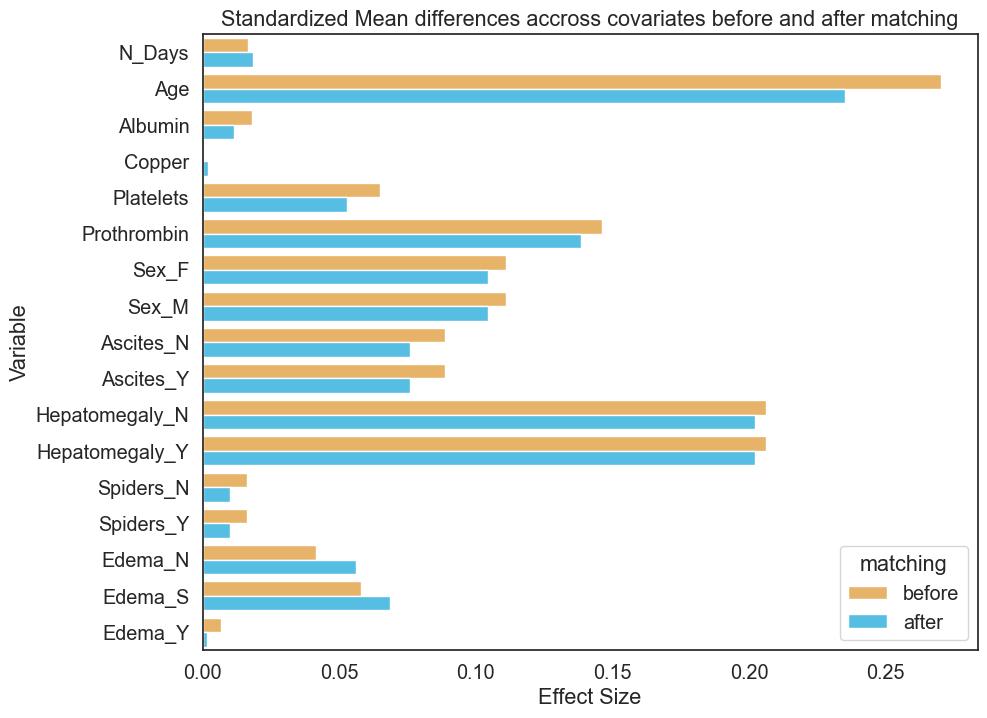

In [51]:
psm.effect_size_plot()

In [52]:
psm.effect_size

,Variable,matching,Effect Size
0,N_Days,before,0.016672
1,N_Days,after,0.018487
2,Age,before,0.270088
3,Age,after,0.235156
4,Albumin,before,0.017989
5,Albumin,after,0.011533
6,Copper,before,0.000076
7,Copper,after,0.001976
8,Platelets,before,0.065092
9,Platelets,after,0.052940


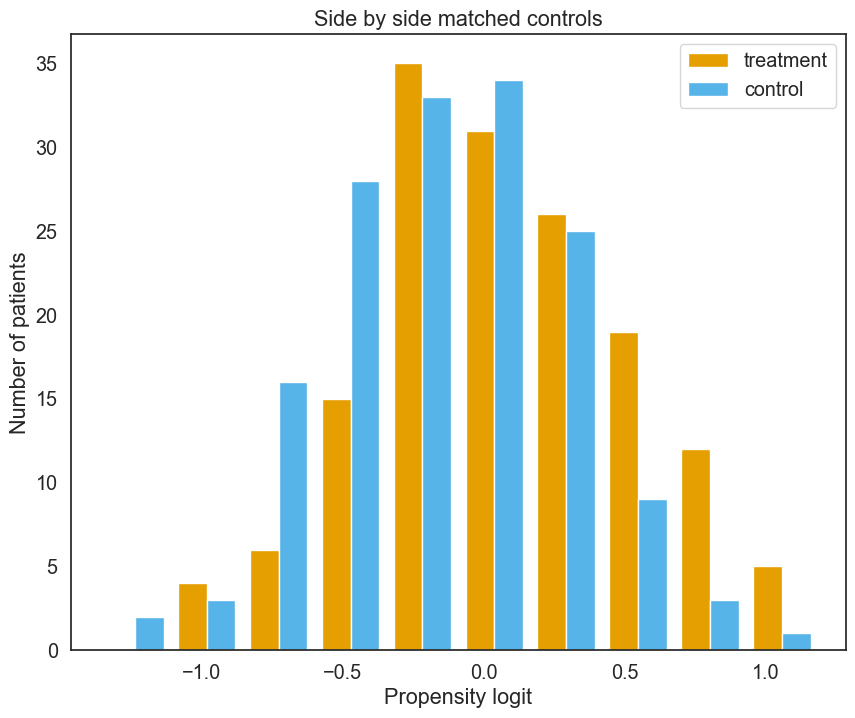

In [53]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'],save=True)

In [54]:
import dowhy
from dowhy import CausalModel as cm
cm?

In [55]:
import causalinference
from causalinference import CausalModel as cmm

In [56]:
newdata.head()

,ID,N_Days,Status,Drug,Age,Albumin,Copper,Platelets,Prothrombin,Stage,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,1,400,1,1,21464,2.60,156.0,190.0,12.2,4,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,4500,0,1,20617,4.14,54.0,221.0,10.6,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3,1012,1,1,25594,3.48,210.0,151.0,12.0,4,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1925,1,1,19994,2.54,64.0,183.0,10.3,4,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,1504,0,0,13918,3.53,143.0,136.0,10.9,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [57]:
y= newdata.loc[:,"Stage"].values
d= newdata.loc[:,"Drug"].values
x= newdata.drop(columns=["Stage","Drug","Status","ID"]).values
model=cmm(y,d,x)
model.est_via_matching(bias_adj=True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.171      0.130     -1.316      0.188     -0.426      0.084
           ATC     -0.238      0.142     -1.677      0.094     -0.517      0.040
           ATT     -0.106      0.152     -0.698      0.485     -0.404      0.192



C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\causalinference\estimators\matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef
